In [168]:
print("Fait par Camillia HAMMOU 3AL1 -Version1.4")

Fait par Camillia HAMMOU 3AL1 -Version1.4


# TP – Installation environnement et Analyse de la donnée

In [169]:
# Loading all libraries which are required for all tasks
import pandas as pd # To load and analyse dataset
import matplotlib.pyplot as plt # To draw graph
import seaborn as sns # To draw colorful graph
import numpy as np
from scipy.stats import norm # For normal distribution
from scipy.stats import chi2_contingency # For p-value and chi-square

In [170]:
df = pd.read_csv("Donnée .csv") # Reading from DataFrame

In [171]:
df.head() # Displaying first few lines

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


#### De combien de lignes se compose le dataframe ?

In [172]:
num_lines = df.shape[0]
print("Number of lines in the dataframe:", num_lines)

Number of lines in the dataframe: 801


####  Combien de variable compose le dataframe ?

In [173]:
num_variables = df.shape[1]
print("Number of variables in the dataframe:", num_variables)

Number of variables in the dataframe: 41


#### Quel est la répartition des variables par type ?

In [174]:
df.dtypes.value_counts()

float64    21
int64      13
object      7
dtype: int64

#### Peut-on noter la présence de valeurs null (Vide) ?
Oui, nous avons noté la présence en utilisant la fonction info() de pandas, une fois que nous avons exécuté la fonction, nous pouvons voir qu'il y a 801 entrées
pour chaque colonne mais
- pour la variable 'type2', il y a 417 valeurs, ce qui indique qu'il y a des valeurs manquantes dans la base de données
- pour la variable 'height_m', il y a 781 valeurs, ce qui indique qu'il y a des valeurs manquantes dans la base de données
- pour la variable 'percentage_male', il y a 703 valeurs, ce qui indique qu'il y a des valeurs manquantes dans la base de données
- pour la variable 'weight_kg', il y a 781 valeurs, ce qui indique qu'il y a des valeurs manquantes dans la base de données.

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [176]:
null_values = df.isnull()

# Count the number of null values in each column
null_counts = null_values.sum()
print(null_counts)

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


#### Ces valeurs null sont-elles problématiques ?
Oui, elles sont problématiques car un trop grand nombre de valeurs nulles peut conduire à de mauvaises prédictions.En effet, si elles ne sont pas traitées correctement, elles peuvent conduire à une analyse biaisée ou inexacte.


# Analyse univariée 


In [177]:
df.columns # To view which variable to select

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

### Deux visualisations représentant des variables Numériques 
Nous avons choisi les variables numériques sp_attack et speed pour les visualisations. Nous pouvons exécuter une boucle pour toutes les variables numériques si nous le souhaitons. Pour les visualisations, nous avons utilisé l'histogramme et le graphique de densité.

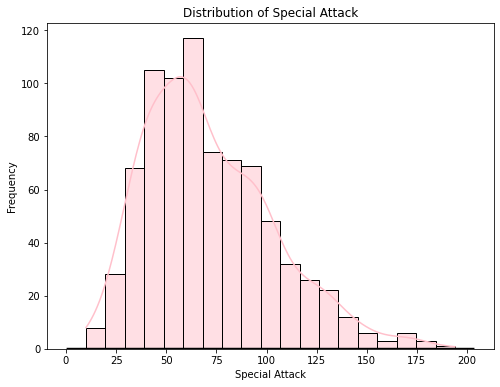

In [178]:
plt.figure(figsize=(8, 6))
sns.histplot(df['sp_attack'], kde=True, color='pink', edgecolor='black')
plt.xlabel('Special Attack')
plt.ylabel('Frequency')
plt.title('Distribution of Special Attack')

# Adding a normal distribution curve based on the mean and standard deviation
mean_attack = np.mean(df['sp_attack'])
std_attack = np.std(df['sp_attack'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_attack, std_attack)
plt.plot(x, p, 'k', linewidth=2)

plt.show()

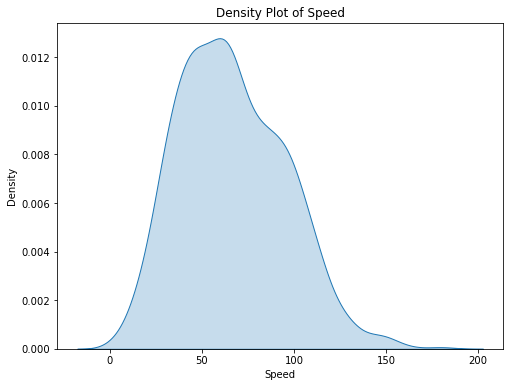

In [179]:
import seaborn as sns

# Density plot (Kernel Density Estimate)
plt.figure(figsize=(8, 6))
sns.kdeplot(df['speed'], fill=True)
plt.title('Density Plot of Speed')
plt.xlabel('Speed')
plt.ylabel('Density')
plt.show()


### Deux visualisations présentant deux variables catégorielles

#### Variables catégorielles qui nous aident à classer les données en différentes catégories.

### Deux visualisations représentant des variables catégorielles
Nous avons choisi les variables catégorielles is_legendary et type1 pour les visualisations. Nous utilisons pour cela des diagrammes à barres et des diagrammes circulaires.

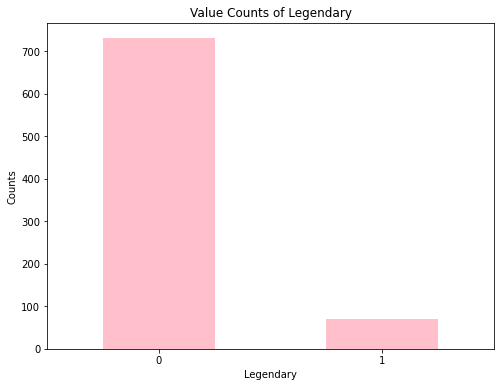

In [180]:
plt.figure(figsize=(8, 6))
categorical_one = df['is_legendary'].value_counts()
categorical_one.plot(kind='bar', color='pink')
plt.xlabel('Legendary')
plt.ylabel('Counts')
plt.title('Value Counts of Legendary')
plt.xticks(rotation=0)
plt.show()

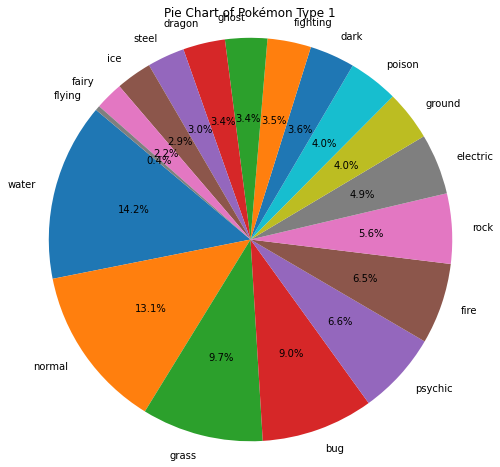

In [181]:
# Pie chart
plt.figure(figsize=(8, 8))
type1_counts = df['type1'].value_counts()
plt.pie(type1_counts, labels=type1_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Pokémon Type 1')
plt.axis('equal')  # Equal aspect ratio ensure that pie is drawn as a circle
plt.show()

In [182]:
df['is_legendary'].value_counts() # Categorical variable number 1

0    731
1     70
Name: is_legendary, dtype: int64

In [183]:
df['generation'].value_counts() # Categorical variable number 2

5    156
1    151
3    135
4    107
2    100
7     80
6     72
Name: generation, dtype: int64

### Des statistiques descriptives d’au moins 4 variables numériques

Les statistiques descriptives sont utilisées pour déterminer dans quelle mesure les données numériques sont réparties.

In [184]:
numerical_variables = ['sp_attack', 'sp_defense', 'speed', 'defense']

numerical_df = df[numerical_variables]

numerical_df.describe()

,sp_attack,sp_defense,speed,defense
count,801.000000,801.000000,801.000000,801.000000
mean,71.305868,70.911361,66.334582,73.008739
std,32.353826,27.942501,28.907662,30.769159
min,10.000000,20.000000,5.000000,5.000000
25%,45.000000,50.000000,45.000000,50.000000
50%,65.000000,66.000000,65.000000,70.000000
75%,91.000000,90.000000,85.000000,90.000000
max,194.000000,230.000000,180.000000,230.000000


### Des comptes de 2 variables catégorielles

In [185]:
categorical_one = df['is_legendary'].value_counts()
print("Account for", categorical_one)

Account for 0    731
1     70
Name: is_legendary, dtype: int64


In [186]:
categorical_two = df['generation'].value_counts()
print("Account for", categorical_two)

Account for 5    156
1    151
3    135
4    107
2    100
7     80
6     72
Name: generation, dtype: int64


#   Analyse multivariée


### Pour les variables catégorielles
Auparavant, nous ne tenions pas compte de la relation entre les variables numériques et catégorielles.
Nous avons traité chaque variable comme une entité distincte, mais ici, ce que nous faisons, c'est que nous voulons tester les deux variables simultanément pour déterminer leur relation,
nous voulons tester les deux simultanément pour déterminer la relation.(si je ne me trompe pas)

### Deux visualisations présentant deux variables numériques


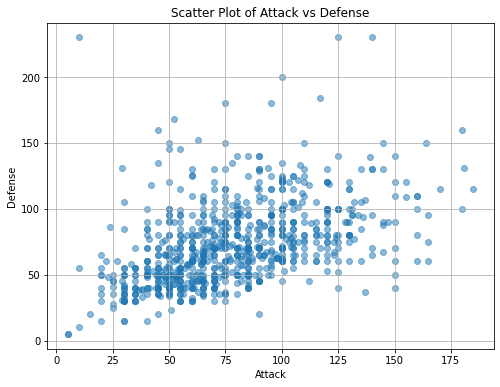

In [187]:
# We are using Scatter plot and Histogram to find relationship between two variables
plt.figure(figsize=(8, 6))
plt.scatter(df['attack'], df['defense'], alpha=0.5)
plt.title('Scatter Plot of Attack vs Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.grid(True)
plt.show()

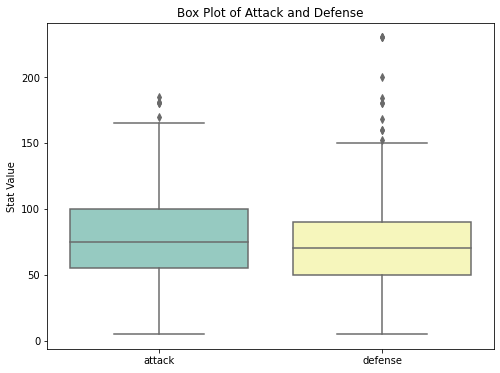

In [188]:
# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['attack', 'defense']], palette="Set3")
plt.title('Box Plot of Attack and Defense')
plt.ylabel('Stat Value')
plt.show()

### Deux visualisations présentant deux variables catégorielles
Nous utilisons des variables de type 1 et de type 2 et, pour ce faire, nous avons utilisé le diagramme à barres groupées et la carte thermique.

<Figure size 1440x576 with 0 Axes>

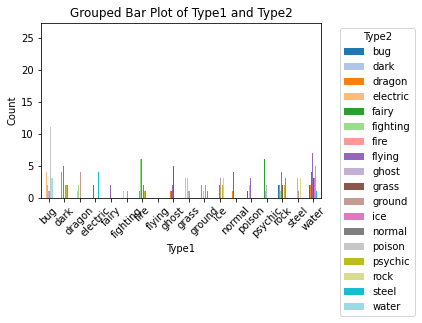

In [189]:
type_counts = df.groupby(['type1', 'type2']).size().unstack(fill_value=0)

# Plot the grouped bar plot
plt.figure(figsize=(20, 8))
type_counts.plot(kind='bar', cmap='tab20')
plt.title('Grouped Bar Plot of Type1 and Type2')
plt.xlabel('Type1')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type2', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

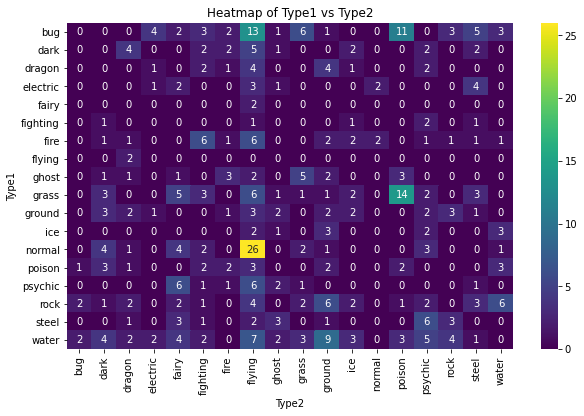

In [190]:
# Create a pivot table with count of Pokemon for each unique combination of Type1 and Type2
pivot_table = df.pivot_table(index='type1', columns='type2', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='g')
plt.title('Heatmap of Type1 vs Type2')
plt.xlabel('Type2')
plt.ylabel('Type1')
plt.show()

### Deux visualisations présentant une variable catégorielle et une variable numérique
Nous avons utilisé base_happiness et sp_attack. Nous utilisons ViolinPlot et BoxPlot pour cela.

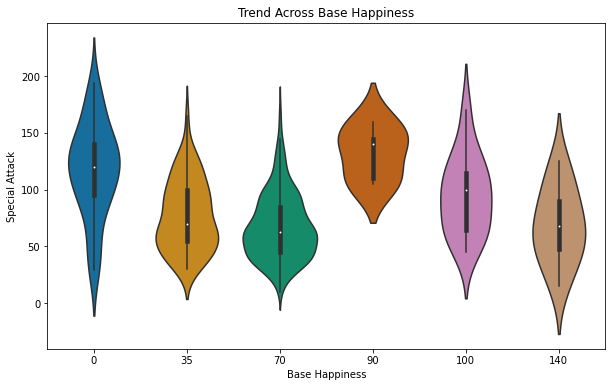

In [191]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='base_happiness', y='sp_attack', data=df, palette='colorblind')
plt.xlabel('Base Happiness')
plt.ylabel('Special Attack')
plt.title('Trend Across Base Happiness')
plt.xticks(rotation=0)
plt.show()

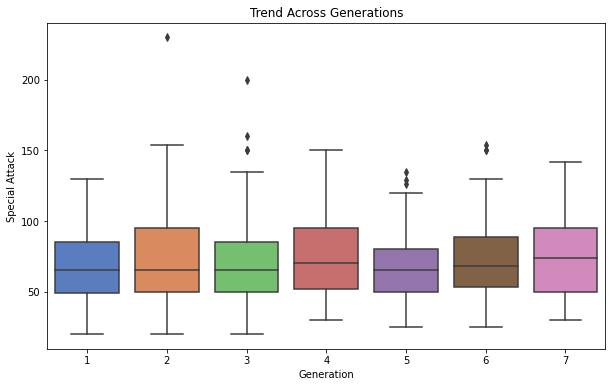

In [192]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='generation', y='sp_defense', data=df, palette='muted')
plt.xlabel('Generation')
plt.ylabel('Special Attack')
plt.title('Trend Across Generations')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

#  Analyse de corrélation


### Explorer les corrélations entre les variables numériques à l'aide d'une matrice de corrélation

In [193]:
# Feature I want to include in my correlation heatmap
numerical_features = ['against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water']

correlation_matrix = df[numerical_features].corr()
correlation_matrix


,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
against_bug,1.000000,0.230107,0.165430,-0.246943,0.239566,0.137902,0.202778,0.183343,0.129174,0.079197,-0.186841,0.148176,0.215589,0.354255,-0.463272,-0.210522,0.055504,-0.254732
against_dark,0.230107,1.000000,0.140830,-0.015830,-0.301354,-0.357981,0.010527,-0.179697,0.672337,-0.006533,-0.007660,-0.010763,-0.413632,-0.236919,-0.230415,0.011963,-0.119758,-0.001976
against_dragon,0.165430,0.140830,1.000000,-0.108928,0.439705,0.035237,-0.261570,0.064850,-0.049941,-0.037135,-0.120042,0.350048,0.142035,-0.210199,0.100153,0.090184,-0.227697,-0.096549
against_electric,-0.246943,-0.015830,-0.108928,1.000000,-0.089864,-0.102798,-0.279029,-0.111461,-0.073031,0.056209,-0.269444,-0.328531,0.076699,-0.015769,-0.017592,0.417261,-0.187543,-0.297600
against_fairy,0.239566,-0.301354,0.439705,-0.089864,1.000000,0.157712,-0.169489,0.199862,-0.120806,0.052899,-0.256504,0.273650,0.149488,0.146464,-0.145238,-0.205444,0.130323,-0.218937
against_fight,0.137902,-0.357981,0.035237,-0.102798,0.157712,1.000000,-0.076480,-0.318941,-0.546982,0.269157,0.358793,-0.220239,-0.006997,-0.189798,-0.264938,-0.240964,0.165066,0.205249
against_fire,0.202778,0.010527,-0.261570,-0.279029,-0.169489,-0.076480,1.000000,0.528127,0.050570,-0.463634,-0.260766,0.186361,-0.055106,0.184334,-0.018519,0.120747,0.115992,-0.242635
against_flying,0.183343,-0.179697,0.064850,-0.111461,0.199862,-0.318941,0.528127,1.000000,0.013204,-0.358467,-0.465010,0.277935,0.266780,0.484843,0.375023,0.161885,0.001264,-0.311997
against_ghost,0.129174,0.672337,-0.049941,-0.073031,-0.120806,-0.546982,0.050570,0.013204,1.000000,0.029542,0.093727,-0.052531,-0.404780,-0.105137,-0.084496,-0.061013,-0.002008,0.009046
against_grass,0.079197,-0.006533,-0.037135,0.056209,0.052899,0.269157,-0.463634,-0.358467,0.029542,1.000000,0.195064,-0.239682,-0.127550,-0.221946,-0.093657,-0.375177,0.082812,0.229968


### Rendez cette visualisation plus agréable et plus « visuelle » grâce à une « Heatmap ».


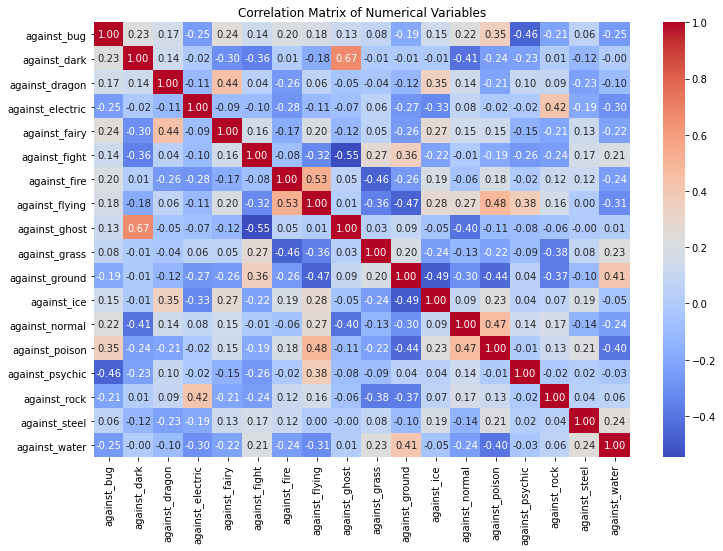

In [194]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

### Quelles variables sont les plus corrélées dans le dataframe ?

In [195]:
# Finding most correlated variables
highest_correlations = correlation_matrix.unstack().sort_values(ascending=False)
most_correlated = highest_correlations[(highest_correlations < 1) & (highest_correlations.abs() >= 0.5)].head(5)
print("Most correlated variables:")
print(most_correlated)

Most correlated variables:
against_dark    against_ghost     0.672337
against_ghost   against_dark      0.672337
against_fire    against_flying    0.528127
against_flying  against_fire      0.528127
against_ghost   against_fight    -0.546982
dtype: float64


### Produisez deux visualisations permettant de visualiser l’existence de cette corrélation

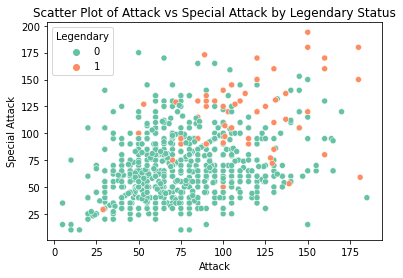

In [196]:
sns.scatterplot(x='attack', y='sp_attack', data=df, hue='is_legendary', palette='Set2')
plt.title('Scatter Plot of Attack vs Special Attack by Legendary Status')
plt.xlabel('Attack')
plt.ylabel('Special Attack')
plt.legend(title='Legendary', loc='upper left')
plt.show()

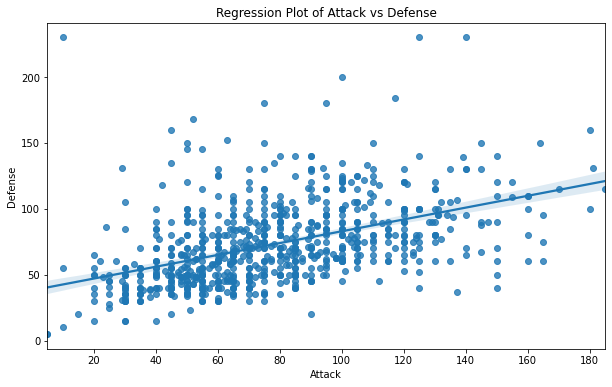

In [197]:
plt.figure(figsize=(10, 6))
sns.regplot(x='attack', y='defense', data=df)
plt.title('Regression Plot of Attack vs Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

### Enfin montrer des distributions comparées par rapport à une variable catégorielle en comparant des Pokémon « Fighter » et « Psychic » sur leur valeur d’attaque spéciale

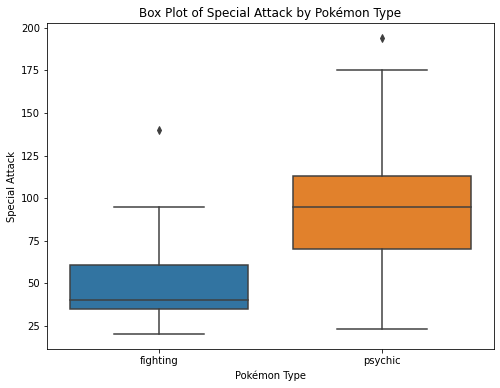

In [198]:
# Filter data for Fighter and Psychic Pokémon
fighter_psychic_df = df[df['type1'].isin(['fighting', 'psychic'])]

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='type1', y='sp_attack', data=fighter_psychic_df)
plt.title('Box Plot of Special Attack by Pokémon Type')
plt.xlabel('Pokémon Type')
plt.ylabel('Special Attack')
plt.show()

### Bonus : Etudier la corrélation des variables catégorielles en appliquant un test d’indépendance du Khi² (Grace à la librairie scipy et la fonction : chi²)

In [199]:
#Chi-square test of independence for categorical variable
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['type1'], df['is_legendary']))
print("Chi-square value:", chi2)
print("P-value:", p)

Chi-square value: 73.90834615654452
P-value: 4.532581978427346e-09


### Ressources intéressantes utilisées: 

-https://youtu.be/8Vq9MkTklCM?si=a_eMPPmlXc8bG2pM

-https://youtu.be/8Vq9MkTklCM?si=a_eMPPmlXc8bG2pM

-Documentation pandas : API reference — pandas 2.2.1 documentation (pydata.org)

-Galerie seaborn: Example gallery — seaborn 0.13.2 documentation (pydata.org)

-Documentation plotly : https://plotly.com/python/

-Comment choisir vos visualisations : https://www.data-to-viz.com/#chord (Celui-ci était super! et m'a beaucoup aidée)

-Tutorial vidéo Python et Machine Learning :https://www.youtube.com/playlist?list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq

-Aller plus loin sur la théorie : https://www.youtube.com/@statquest/videos

-https://youtu.be/RmKB474UE2A?si=7ARKB7lnK4bS8_-A

-https://youtu.be/qWEHO8b6WbA?si=g2-htUdH2B5i1rwH